In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(tf.__version__)

2.1.0


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [5]:
print(xtrain[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
print(ytrain[0])

5


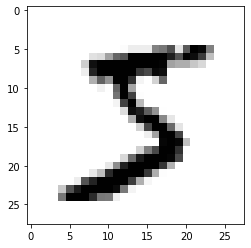

In [7]:
plt.imshow(xtrain[0], cmap = plt.cm.binary)

In [8]:
xtrain = tf.keras.utils.normalize(xtrain, axis=1)
xtest = tf.keras.utils.normalize(xtest, axis=1)

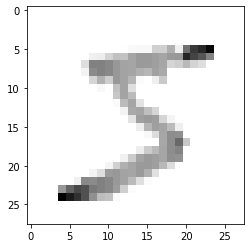

In [9]:
plt.imshow(xtrain[0], cmap = plt.cm.binary)

### Creating a Neural Network

In [10]:
model = tf.keras.models.Sequential()

In [11]:
# we need input 28x28 to be in a 1D format. So we use Flatten Layer
model.add(tf.keras.layers.Flatten())

In [12]:
# Now add hidden layers. We are adding one of 128 neurons
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [13]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [14]:
# Final layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(xtrain, ytrain, epochs=8)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2714 - accuracy: 0.9207
Epoch 2/8
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1101 - accuracy: 0.9653
Epoch 3/8
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0760 - accuracy: 0.9754
Epoch 4/8
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0563 - accuracy: 0.9817
Epoch 5/8
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0418 - accuracy: 0.9869
Epoch 6/8
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0339 - accuracy: 0.9890
Epoch 7/8
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0267 - accuracy: 0.9912
Epoch 8/8
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0214 - accuracy: 0.9929


In [17]:
val_loss, val_acc = model.evaluate(xtest, ytest)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.0891 - accuracy: 0.9783


In [18]:
predictions = model.predict(xtest)

In [19]:
predictions[0]

array([2.0201014e-15, 3.3986117e-12, 2.3494118e-09, 1.9969116e-07,
       8.7143509e-13, 4.3156428e-10, 4.6956567e-23, 9.9999976e-01,
       7.6142529e-14, 2.1408824e-09], dtype=float32)

2

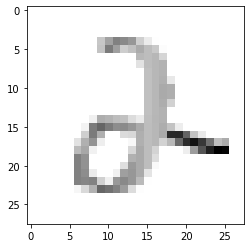

In [26]:
i=990

plt.imshow(xtest[i], cmap=plt.cm.binary)
np.argmax(predictions[i])

In [21]:
#model.save('mnist-deep-nn.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist-deep-nn.model\assets


In [22]:
#m = model.load